In [33]:
from sklearn import datasets, model_selection, neighbors, metrics, cluster 
import matplotlib.pyplot as plt 
from collections import Counter

# Data import and split 

In [34]:
data = datasets.load_digits()

In [35]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

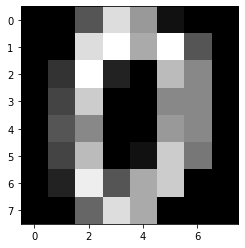

In [36]:
test = data.data[0].reshape(8,8)
plt.imshow(test, cmap = 'gray')

In [37]:
X = data.data
y = data.target
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3)
X_train.shape

(1257, 64)

# k-NN classifier

In [38]:
clf = neighbors.KNeighborsClassifier(algorithm = 'brute', n_neighbors = 5).fit(X_train, y_train)
y_pred = clf.predict(X_test)
dists, n_neighbors = clf.kneighbors(X_test)
print(metrics.classification_report(y_test, y_pred))
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        57
           2       0.98      1.00      0.99        50
           3       0.95      0.96      0.96        56
           4       0.98      1.00      0.99        55
           5       0.99      0.99      0.99        70
           6       1.00      1.00      1.00        47
           7       0.98      1.00      0.99        54
           8       0.98      0.98      0.98        49
           9       0.98      0.91      0.95        58

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

[[44  0  0  0  0  0  0  0  0  0]
 [ 0 57  0  0  0  0  0  0  0  0]
 [ 0  0 50  0  0  0  0  0  0  0]
 [ 0  0  1 54  0  0  0  1  0  0]
 [ 0  0  0  0 55  0  0  0  0  0]
 [ 0  0  0  0  0 69  0  0  0  1]
 [ 0  0  0  0  0  0 47  0  0  0]
 [ 0  0  0

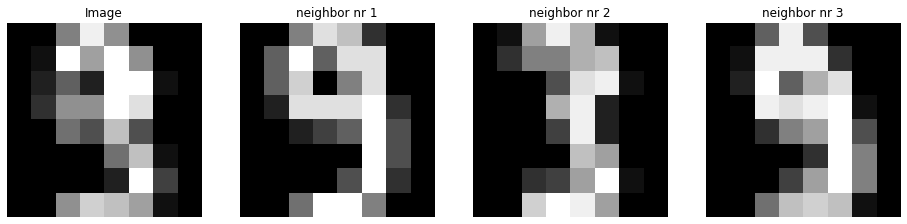

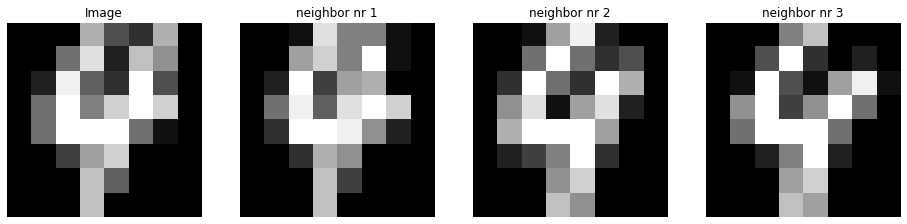

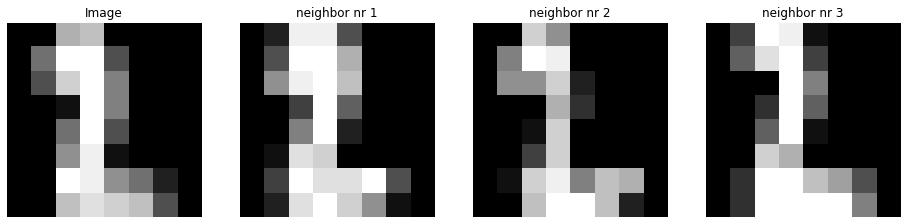

In [39]:
for i in range(1,4): 
    _, nearest = clf.kneighbors(X_test[i].reshape(1,-1))
    plt.figure(figsize = (16, 4))
    plt.subplot(1, 4, 1)
    plt.imshow(X_test[i].reshape(8,8), cmap = 'gray')
    plt.title('Image')
    plt.axis('off')
    for j in range(1,4):
        plt.subplot(1,4, j + 1)
        plt.imshow(X_train[nearest[0, j]].reshape(8,8), cmap = 'gray')
        plt.title('neighbor nr {}'.format(j))
        plt.axis('off')
    plt.show()
    

# k Means

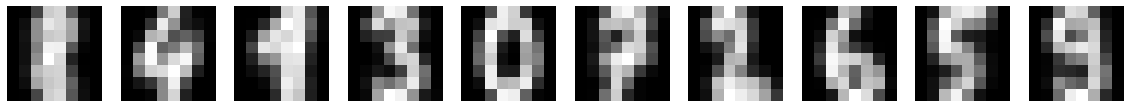

In [40]:
kmeans = cluster.KMeans(n_clusters = 10).fit(X_train)
centers = kmeans.cluster_centers_
plt.figure(figsize = (20, 10))
for i, center in enumerate(centers):
    plt.subplot(1, 10, i+1)
    plt.imshow(center.reshape(8,8), cmap = 'gray')
    plt.axis('off')
plt.show()

In [41]:
y_pred = kmeans.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        44
           1       0.00      0.00      0.00        57
           2       0.03      0.02      0.03        50
           3       0.91      0.86      0.88        56
           4       0.00      0.00      0.00        55
           5       0.00      0.00      0.00        70
           6       0.00      0.00      0.00        47
           7       0.00      0.00      0.00        54
           8       0.00      0.00      0.00        49
           9       0.55      0.76      0.64        58

    accuracy                           0.17       540
   macro avg       0.15      0.16      0.15       540
weighted avg       0.16      0.17      0.16       540

[[ 0  1  0  0 43  0  0  0  0  0]
 [32  0 19  0  0  0  5  0  1  0]
 [ 4  0  1  3  0  0 41  0  0  1]
 [ 1  0  0 48  0  2  0  0  1  4]
 [ 2 47  2  0  0  4  0  0  0  0]
 [ 0  1  0  0  0  0  0  0 51 18]
 [ 0  0  0  0  1  0  0 46  0  0]
 [ 1  0  2

In [42]:
print(metrics.completeness_score(y_test, y_pred)) 
print(metrics.homogeneity_score(y_test, y_pred))
print(metrics.adjusted_mutual_info_score(y_test, y_pred))

0.7286836654243876
0.7214480144598904
0.7151773752448164


In [43]:
y_pred_new = kmeans.predict(X_train)
print(metrics.completeness_score(y_train, y_pred_new)) 
print(metrics.homogeneity_score(y_train, y_pred_new))
print(metrics.adjusted_mutual_info_score(y_train, y_pred_new))

0.7549496266349079
0.747321116083896
0.7474964717150258


## Get 'correct' class labels from training set 

In [44]:
cluster_label_dict = {i: [] for i in range(0,10)}
for i, image in enumerate(X_train): 
    pred = kmeans.predict(image.reshape(1,-1))[0]
    cluster_label_dict[pred]  += [y_train[i]]
for cluster in cluster_label_dict: 
    cluster_label_dict[cluster] = Counter(cluster_label_dict[cluster]).most_common(1)[0]
y_pred = [cluster_label_dict[pred][0] for pred in y_pred]

In [45]:
print(metrics.classification_report(y_test, y_pred))
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        44
           1       0.50      0.89      0.65        57
           2       0.84      0.82      0.83        50
           3       0.91      0.86      0.88        56
           4       0.96      0.85      0.90        55
           5       0.85      0.73      0.78        70
           6       0.98      0.98      0.98        47
           7       0.82      0.87      0.85        54
           8       0.00      0.00      0.00        49
           9       0.55      0.76      0.64        58

    accuracy                           0.77       540
   macro avg       0.74      0.77      0.75       540
weighted avg       0.74      0.77      0.75       540

[[43  0  0  0  1  0  0  0  0  0]
 [ 0 51  5  0  0  1  0  0  0  0]
 [ 0  5 41  3  0  0  0  0  0  1]
 [ 0  1  0 48  0  1  0  2  0  4]
 [ 0  4  0  0 47  0  0  4  0  0]
 [ 0  0  0  0  1 51  0  0  0 18]
 [ 1  0  0  0  0  0 46  0  0  0]
 [ 0  3  0

/Users/rasmushelander/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
cluster_label_dict

{0: (1, 67),
 1: (4, 116),
 2: (1, 36),
 3: (3, 107),
 4: (0, 133),
 5: (7, 121),
 6: (2, 107),
 7: (6, 131),
 8: (5, 85),
 9: (9, 96)}